In [1]:
keysizes = """
rsasha1.example|1701
rsasha256.example|1703
rsasha512.example|1704
ecdsa256.example|114
ecdsa384.example|134
ed25519.example|106
ed448.example|136
falcon.example|2977
"""

In [2]:
import pandas as pd

In [3]:
data = pd.DataFrame([
    {
        'algorithm': s.split('.')[0],
        'size': int(s.split('|')[1]),
    }
    for s in keysizes.split('\n') if s
])

In [4]:
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')

ALGORITHMS = {
    5: "rsasha1", 8: "rsasha256", 10: "rsasha512",  # pdns also supports 7: "rsasha1-nsec3-sha1",
    13: "ecdsa256", 14: "ecdsa384",
    15: "ed25519", 16: "ed448",
    17: "falcon",
}
ALGORITHM_COLORS = {
    "rsasha1": "#ff0000", "rsasha256": "#dd0000", "rsasha512": "#bb0000",
    "ecdsa256": "#00ff00", "ecdsa384": "#00dd00",
    "ed25519": "#0000ff", "ed448": "#0000dd",
    "falcon": "#00ffff",
}
ALGORITHM_ORDER = list(ALGORITHM_COLORS.keys())
ALGORITHM_PALETTE = sns.color_palette([ALGORITHM_COLORS[a] for a in ALGORITHM_ORDER])

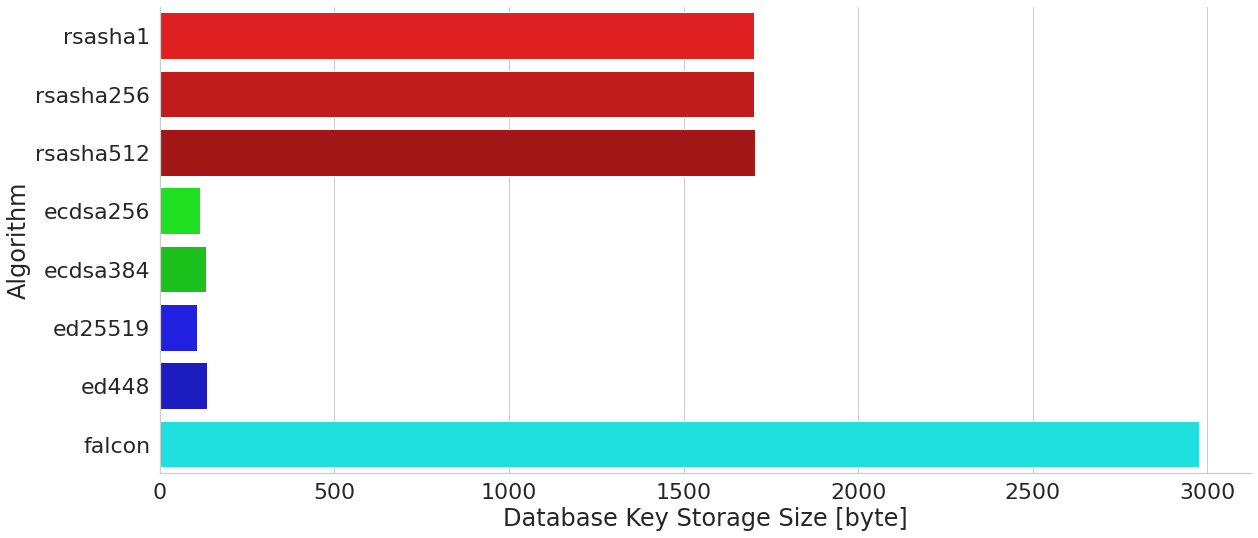

In [5]:
g = sns.catplot(
    data=data,
    x='size',
    y='algorithm',
    hue_order=ALGORITHM_ORDER, palette=ALGORITHM_PALETTE,
    kind='bar',
    height=8,
    aspect=18/8,
)
g.set(
    ylabel='Algorithm',
    xlabel='Database Key Storage Size [byte]',
)